# CMIP5 and CMIP6 ScenarioMIP

Here we make a figure comparing CMIP5 and CMIP6 ScenarioMIP output for our graphical abstract.

In [1]:
import glob
import os.path
import requests
import shutil
import zipfile

import matplotlib.pyplot as plt
import netcdf_scm.io
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm.autonotebook as tqdman
from scmdata import run_append, ScmRun

<ipython-input-1-a6008b5f181c>:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
FORCE_DOWNLOAD = False

In [3]:
DATA_DIR = os.path.join(".", "scenariomip_data")
DATA_DIR

'./scenariomip_data'

In [4]:
ZIP_FILE = os.path.join(".", "scenariomip_data.zip")
ZIP_FILE

'./scenariomip_data.zip'

In [5]:
 experiments_to_download = (
    "ssp126",
    "ssp245",
    "ssp460",
    "ssp585",
    "rcp26",
    "rcp45",
    "rcp60",
    "rcp85",
    "historical",
)

variables_to_download = (
    "tas",
)

if FORCE_DOWNLOAD:
    if os.path.isdir(DATA_DIR):
        shutil.rmtree(DATA_DIR)

if not os.path.isdir(DATA_DIR):
    print("Downloading relevant data")
    for exp in tqdman.tqdm(experiments_to_download, desc="experiment"):
        for var in tqdman.tqdm(variables_to_download, desc="variable", leave=False):
            params = (
                ("experiment_id", exp),
                ("variable_id", var),
                ("normalised", "21-yr-running-mean"),
                ("timeseriestype", "monthly"),
            )
            url = "https://cmip6.science.unimelb.edu.au/api/v1/download_zip"
            r = requests.get(url, params=params)

            with open(ZIP_FILE, "wb") as f:
                f.write(r.content)

            zip_ref = zipfile.ZipFile(ZIP_FILE, "r")
            zip_ref.extractall(DATA_DIR)
            zip_ref.close()

In [6]:
with open(os.path.join(DATA_DIR, "README.txt"), "r") as fh:
    print(fh.read())

README
------

Acknowledging CMIP

The data provided here are derived from the outputs of the `Coupled Model Intercomparison Project <https://www.wcrp-climate.org/wgcm-cmip>`_ data.
This means that you **must** abide by the terms of use of the data, in particular the required acknowledgement statements (see the `CMIP5 terms of use <https://pcmdi.llnl.gov/mips/cmip5/terms-of-use.html>`_ and `CMIP6 terms of use <https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html>`_).

To make it easier to do this, we have developed some basic tools which simplify the process of checking model license terms and creating the tables required in publications to cite CMIP data (see the `our tools here <https://netcdf-scm.readthedocs.io/en/latest/usage/using-cmip-data.html>`_).
However, we provide no guarantees that these tools are up to date so all users should double check that they do in fact produce output consistent with the terms of use referenced above (and if there are issues, please raise an i

In [7]:
tas_files = sorted(
    glob.glob(
        os.path.join(DATA_DIR, "**", "monthly", "**", "NORMED*tas**.MAG",),
        recursive=True,
    )
)
len(tas_files)

785

In [8]:
tas_files[0]

'./scenariomip_data/monthly/CMIP6/CMIP/AWI/AWI-CM-1-1-MR/historical/r1i1p1f1/Amon/tas/gn/v20200511/NORMED_netcdf-scm_tas_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-185012.MAG'

In [9]:
db = run_append([
    netcdf_scm.io.load_mag_file(f, drs="CMIP6Output" if "CMIP6" in f else "MarbleCMIP5").filter(region="World")
    for f in tqdman.tqdm(tas_files)
])
db.head()

time                                                                                     1850-01-15 12:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.91309   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                  -2.34184   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.82603   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.92163   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                  -2.15045   

time                                                                                     1850-02-14 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.77473   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                  -2.28759   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.57125   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.96612   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                  -2.13960   

time                                                                                     1850-03-15 12:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.26864   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.44064   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                  -0.86268   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.20005   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                  -1.22216   

time                                                                                     1850-04-15 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.426083   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.311232   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.075825   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.225954   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.304796   

time                                                                                     1850-05-15 12:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                  0.658890   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                  0.475436   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                  0.891193   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                  0.813639   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                  0.716358   

time                                                                       

In [10]:
db_annual_mean = db.time_mean("AC")
db_annual_mean.head()

time                                                                                     1850-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.123191   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.264575   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                  0.007478   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.087838   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                 -0.132763   

time                                                                                     1851-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   

time                                                                                     1852-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   

time                                                                                     1853-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   

time                                                                                     1854-07-01 00:00:00  \
activity_id climate_model member_id mip_era model       region scenario   unit variable                        
CMIP        AWI-CM-1-1-MR r1i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r2i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r3i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r4i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   
                          r5i1p1f1  CMIP6   unspecified World  historical K    tas                       NaN   

time                                                                       

In [11]:
pdf = pd.concat([
    db_annual_mean.filter(scenario="historical").long_data(time_axis="year"),
    db_annual_mean.filter(scenario="ssp*", year=range(2015, 3000)).long_data(time_axis="year"),
    db_annual_mean.filter(scenario="rcp*", year=range(2006, 3000)).long_data(time_axis="year"),
])
pdf.head()

activity_id  climate_model member_id mip_era        model region  \
0        CMIP  AWI-CM-1-1-MR  r1i1p1f1   CMIP6  unspecified  World   
1        CMIP  AWI-CM-1-1-MR  r2i1p1f1   CMIP6  unspecified  World   
2        CMIP  AWI-CM-1-1-MR  r3i1p1f1   CMIP6  unspecified  World   
3        CMIP  AWI-CM-1-1-MR  r4i1p1f1   CMIP6  unspecified  World   
4        CMIP  AWI-CM-1-1-MR  r5i1p1f1   CMIP6  unspecified  World   

     scenario unit variable  time     value  
0  historical    K      tas  1850 -0.123191  
1  historical    K      tas  1850 -0.264575  
2  historical    K      tas  1850  0.007478  
3  historical    K      tas  1850 -0.087838  
4  historical    K      tas  1850 -0.132763

In [12]:
pdf["Experiment"] = pdf["mip_era"].str.upper() + " " + pdf["scenario"]
pdf.head()

activity_id  climate_model member_id mip_era        model region  \
0        CMIP  AWI-CM-1-1-MR  r1i1p1f1   CMIP6  unspecified  World   
1        CMIP  AWI-CM-1-1-MR  r2i1p1f1   CMIP6  unspecified  World   
2        CMIP  AWI-CM-1-1-MR  r3i1p1f1   CMIP6  unspecified  World   
3        CMIP  AWI-CM-1-1-MR  r4i1p1f1   CMIP6  unspecified  World   
4        CMIP  AWI-CM-1-1-MR  r5i1p1f1   CMIP6  unspecified  World   

     scenario unit variable  time     value        Experiment  
0  historical    K      tas  1850 -0.123191  CMIP6 historical  
1  historical    K      tas  1850 -0.264575  CMIP6 historical  
2  historical    K      tas  1850  0.007478  CMIP6 historical  
3  historical    K      tas  1850 -0.087838  CMIP6 historical  
4  historical    K      tas  1850 -0.132763  CMIP6 historical

In [13]:
pdf_cm_mean = pdf.groupby(["Experiment", "climate_model", "time", "unit"]).mean().reset_index()
pdf_cm_mean.head()

Experiment climate_model  time unit     value
0  CMIP5 historical     ACCESS1-0  1850    K  0.010637
1  CMIP5 historical     ACCESS1-0  1851    K -0.029618
2  CMIP5 historical     ACCESS1-0  1852    K  0.091758
3  CMIP5 historical     ACCESS1-0  1853    K  0.081513
4  CMIP5 historical     ACCESS1-0  1854    K  0.121902

In [14]:
palette = {
    "CMIP5 historical": "tab:gray",
    "CMIP6 historical": "black",
    "CMIP5 rcp26": np.array([0, 52, 102]) / 255,
    "CMIP5 rcp45": np.array([112, 160, 205]) / 255,
    "CMIP5 rcp60": np.array([196, 121,0]) / 255,
    "CMIP5 rcp85": np.array([153, 0, 2]) / 255,
    "CMIP6 ssp126": np.array([29, 51, 84]) / 255,
    "CMIP6 ssp245": np.array([234, 221, 61]) / 255,
    "CMIP6 ssp460": np.array([232, 136, 49]) / 255,
    "CMIP6 ssp585": np.array([132, 11, 34]) / 255,
}

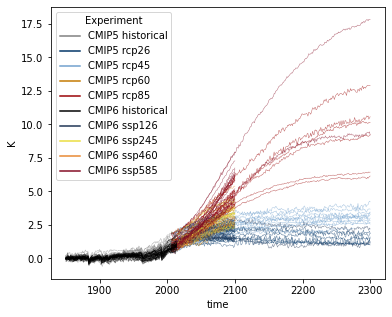

In [15]:
ax = plt.figure(figsize=(6, 5)).add_subplot(111)
sns.lineplot(
    data=pdf_cm_mean,
    x="time",
    y="value",
    hue="Experiment",
    palette=palette,
    units="climate_model",
    estimator=None,
    ci=None,
    ax=ax,
    alpha=0.6,
    linewidth=0.5,
)

ax.set_ylabel(pdf_cm_mean["unit"].unique()[0])
plt.savefig("../figures/graphical-abstract.pdf", transparent=True)